In [91]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [92]:
#loading train & test data
dtrain = pd.read_csv('/content/drive/MyDrive/Artiset/train.csv')
dtest  = pd.read_csv('/content/drive/MyDrive/Artiset/test.csv')
dtest.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,763.0,763.0,GasA,Gd,Y,SBrkr,763,892,0,1655,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993.0,Fin,2.0,440.0,TA,TA,Y,157,84,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Attchd,1992.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,789.0,789.0,GasA,Gd,Y,SBrkr,789,676,0,1465,0.0,0.0,2,1,3,1,TA,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,393.0,TA,TA,Y,0,75,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,7,5,1990,1990,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,Gd,GLQ,637.0,Unf,0.0,663.0,1300.0,GasA,Gd,Y,SBrkr,1341,0,0,1341,1.0,0.0,1,1,2,1,Gd,5,Typ,1,Po,Attchd,1990.0,Unf,2.0,506.0,TA,TA,Y,192,0,0,0,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1970,1970,Gable,CompShg,

In [93]:
print("dtrain shape : " + str(dtrain.shape))
print("dtest shape : " + str(dtest.shape))

dtrain shape : (1460, 81)
dtest shape : (1459, 80)


In [94]:
correlations = dtrain.corr()["SalePrice"].sort_values(ascending=False)
correlations

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [95]:
#droping SalePrice from Dtrain
ytrain= dtrain['SalePrice']
ytrain.shape

(1460,)

In [96]:
dtrain.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [97]:
#drop ID from dtest & dtrain
train_ID = dtrain["Id"]

test_ID = dtest["Id"]
dtrain.drop("Id", axis = 1, inplace = True)
dtest.drop("Id", axis = 1, inplace = True)
dtrain

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,

In [98]:
train_ID

0          1
1          2
2          3
3          4
4          5
        ... 
1455    1456
1456    1457
1457    1458
1458    1459
1459    1460
Name: Id, Length: 1460, dtype: int64

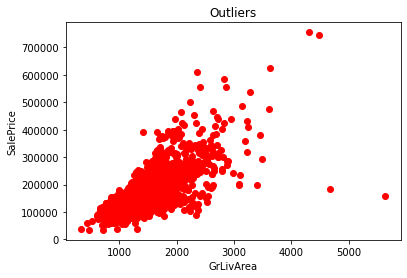

In [99]:
#Identifying & Removing Outlier

plt.scatter(dtrain.GrLivArea, dtrain.SalePrice, c= 'red')
plt.title("Outliers")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

In [100]:
#removing datapoints with area more than 4000 sq. ft.

dtrain = dtrain[dtrain.GrLivArea < 4000]

ytrain=dtrain["SalePrice"]
print(dtrain.shape,ytrain.shape)

(1456, 80) (1456,)


In [101]:
#Missing / NaN values

dtrain_missing = pd.isna(dtrain).sum()

dtrain_missing

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [102]:
print(dtrain.shape,dtest.shape)

(1456, 80) (1459, 79)


In [103]:
train_target_final = np.log(ytrain)

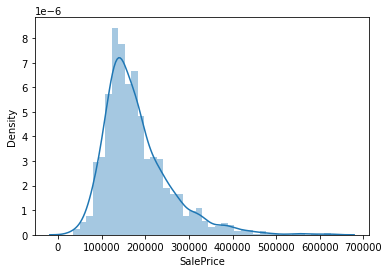

In [104]:
#Check for skewness in saleprices
ytrain = dtrain['SalePrice']
sns.distplot(ytrain)

In [105]:
#There are some features which are categorical and whose missing values are meaningful these we can know by looking Description of Data

meaningful_missing = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", 
                    "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", 
                    "GarageCond", "Fence","PoolQC", "MiscFeature"]

for i in meaningful_missing:
    dtrain[i].fillna("None", inplace=True)
    dtest[i].fillna("None", inplace=True)
print(dtrain.shape,dtest.shape)

(1456, 80) (1459, 79)


In [106]:
train_missing1 = pd.isna(dtrain).sum()
test_missing1 = pd.isna(dtest).sum()

missing1 = pd.concat([train_missing1, test_missing1], axis=1, keys=["Train", "Test"])


missing1_values = missing1[missing1.sum(axis=1) > 0]  #Missing Values
missing1_values

,Train,Test
MSZoning,0,4.0
LotFrontage,259,227.0
Utilities,0,2.0
Exterior1st,0,1.0
Exterior2nd,0,1.0
MasVnrType,8,16.0
MasVnrArea,8,15.0
BsmtFinSF1,0,1.0
BsmtFinSF2,0,1.0
BsmtUnfSF,0,1.0


In [107]:
#LotFrontage which is Numeric value has many missing values so we remove it
dtrain.drop("LotFrontage", axis=1, inplace=True)
dtest.drop("LotFrontage", axis=1, inplace=True)

In [108]:
#Separate Numeric and Categorical features in the train and test data sets

numeric_features_train = dtrain.select_dtypes(include=[np.number])

numeric_features_test = dtest.select_dtypes(include=[np.number])

In [109]:
# There are some Numerical features in the data set which are actually categorical, 
#They are MSSubClass and MoSold (Month sold)
#we need to convert them into categorical
dtrain = dtrain.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

dtest = dtest.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

In [110]:
#Drop Target variable from Train Data set
dtrain = dtrain.drop(['SalePrice'],axis=1)

In [111]:
numeric_features_train = dtrain.select_dtypes(include=[np.number])

numeric_features_test = dtest.select_dtypes(include=[np.number])

In [112]:
categorical_features_train = dtrain.select_dtypes(include=[object])

categorical_features_test = dtest.select_dtypes(include=[object])

In [113]:
numeric_features_train.fillna(numeric_features_train.mean(),inplace=True)
numeric_features_test.fillna(numeric_features_test.mean(),inplace=True)

In [114]:
numeric_features_train.shape

(1456, 33)

In [115]:
numeric_features_test.shape

(1459, 33)

In [116]:
categorical_features_train.fillna(categorical_features_train.mode(), inplace = True)
categorical_features_test.fillna(categorical_features_test.mode(), inplace = True)
categorical_features_train.shape

(1456, 45)

In [117]:
#Combining Categorical features of both train and test sets for Encoding
categorical_features_traintest = pd.concat([categorical_features_train , categorical_features_test])

In [118]:
ntrain = categorical_features_train.shape[0]
ntrain

1456

In [119]:
categorical_features_traintest.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [120]:
#BackwardDifference Encoder
import category_encoders as ce
encoder = ce.BackwardDifferenceEncoder(cols=['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition'])
categorical_encoded = encoder.fit_transform(categorical_features_traintest)

categorical_encoded.head()

,intercept,MSSubClass_0,MSSubClass_1,MSSubClass_2,MSSubClass_3,MSSubClass_4,MSSubClass_5,MSSubClass_6,MSSubClass_7,MSSubClass_8,MSSubClass_9,MSSubClass_10,MSSubClass_11,MSSubClass_12,MSSubClass_13,MSSubClass_14,MSZoning_0,MSZoning_1,MSZoning_2,MSZoning_3,MSZoning_4,Street_0,Alley_0,Alley_1,LotShape_0,LotShape_1,LotShape_2,LandContour_0,LandContour_1,LandContour_2,Utilities_0,Utilities_1,LotConfig_0,LotConfig_1,LotConfig_2,LotConfig_3,LandSlope_0,LandSlope_1,Neighborhood_0,Neighborhood_1,...,GarageCond_3,GarageCond_4,PavedDrive_0,PavedDrive_1,PoolQC_0,PoolQC_1,PoolQC_2,Fence_0,Fence_1,Fence_2,Fence_3,MiscFeature_0,MiscFeature_1,MiscFeature_2,MiscFeature_3,MoSold_0,MoSold_1,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,SaleType_0,SaleType_1,SaleType_2,SaleType_3,SaleType_4,SaleType_5,SaleType_6,SaleType_7,SaleType_8,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4
0,1,-0.9375,-0.875,-0.8125,-0.75,-0.6875,-0.625,-0.5625,-0.5,-0.4375,-0.375,-0.3125,-0.25,-0.1875,-0.125,-0.0625,-0.833333,-0.666667,-0.5,-0.333333,-0.166667,-0.5,-0.666667,-0.333333,-0.75,-0.5,-0.25,-0.75,-0.5,-0.25,-0.666667,-0.333333,-0.8,-0.6,-0.4,-0.2,-0.666667,-0.333333,-0.96,-0.92,...,-0.333333,-0.166667,-0.666667,-0.333333,-0.75,-0.5,-0.25,-0.8,-0.6,-0.4,-0.2,-0.8,-0.6,-0.4,-0.2,-0.916667,-0.833333,-0.75,-0.666667,-0.583333,-0.5,-0.416667,-0.333333,-0.25,-0.166667,-0.083333,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,-0.833333,-0.666667,-0.5,-0.333333,-0.166667
1,1,0.0625,-0.875,-0.8125,-0.75,-0.6875,-0.625,-0.5625,-0.5,-0.4375,-0.375,-0.3125,-0.25,-0.1875,-0.125,-0.0625,-0.833333,-0.666667,-0.5,-0.333333,-0.166667,-0.5,-0.666667,-0.333333,-0.75,-0.5,-0.25,-0.75,-0.5,-0.25,-0.666667,-0.333333,0.2,-0.6,-0.4,-0.2,-0.666667,-0.333333,0.04,-0.92,...,-0.333333,-0.166667,-0.666667,-0.333333,-0.75,-0.5,-0.25,-0.8,-0.6,-0.4,-0.2,-0.8,-0.6,-0.4,-0.2,0.083333,-0.833333,-0.75,-0.666667,-0.583333,-0.5,-0.416667,-0.333333,-0.25,-0.166667,-0.083333,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,-0.833333,-0.666667,-0.5,-0.333333,-0.166667
2,1,-0.9375,-0.875,-0.8125,-0.75,-0.6875,-0.625,-0.5625,-0.5,-0.4375,-0.375,-0.3125,-0.25,-0.1875,-0.125,-0.0625,-0.833333,-0.666667,-0.5,-0.333333,-0.166667,-0.5,-0.666667,-0.333333,0.25,-0.5,-0.25,-0.75,-0.5,-0.25,-0.666667,-0.333333,-0.8,-0.6,-0.4,-0.2,-0.666667,-0.333333,-0.96,-0.92,...,-0.333333,-0.166667,-0.666667,-0.333333,-0.75,-0.5,-0.25,-0.8,-0.6,-0.4,-0.2,-0.8,-0.6,-0.4,-0.2,0.083333,0.166667,-0.75,-0.666667,-0.583333,-0.5,-0.416667,-0.333333,-0.25,-0.166667,-0.083333,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,-0.833333,-0.666667,-0.5,-0.333333,-0.166667
3,1,0.0625,0.125,-0.8125,-0.75,-0.6875,-0.625,-0.5625,-0.5,-0.4375,-0.375,-0.3125,-0.25,-0.1875,-0.125,-0.0625,-0.833333,-0.666667,-0.5,-0.333333,-0.166667,-0.5,-0.666667,-0.333333,0.25,-0.5,-0.25,-0.75,-0.5,-0.25,-0.666667,-0.333333,0.2,0.4,-0.4,-0.2,-0.666667,-0.333333,0.04,0.08,...,-0.333333,-0.166667,-0.666667,-0.333333,-0.75,-0.5,-0.25,-0.8,-0.6,-0.4,-0.2,-0.8,-0.6,-0.4,-0.2,-0.916667,-0.833333,-0.75,-0.666667,-0.583333,-0.5,-0.416667,-0.333333,-0.25,-0.166667,-0.083333,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0.166667,-0.666667,-0.5,-0.333333,-0.166667
4,1,-0.9375,-0.875,-0.8125,-0.75,-0.6875,-0.625,-0.5625,-0.5,-0.4375,-0.375,-0.3125,-0.25,-0.1875,-0.125,-0.0625,-0.833333,-0.666667,-0.5,-0.333333,-0.166667,-0.5,-0.666667,-0.333333,0.25,-0.5,-0.25,-0.75,-0.5,-0.25,-0.666667,-0.333333,0.2,-0.6,-0.4,-0.2,-0.666667,-0.333333,0.04,0.08,...,-0.333333,-0.166667,-0.666667,-0.333333,-0.75,-0.5,-0.25,-0.8,-0.6,-0.4,-0.2,-0.8,-0.6,-0.4,-0.2,0.083333,0.166667,0.25,-0.666667,-0.583333,-0.5,-0.416667,-0.333333,-0.25,-0.166667,-0.083333,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,-0.833333,-0.666667,-0.5,-0.333333,-0.166667


In [121]:
#Separating Categorical features of Train and test data sets after encoding
categorical_train_encoded = categorical_encoded[:ntrain]
categorical_test_encoded = categorical_encoded[ntrain:]

In [122]:
final_train = pd.concat([numeric_features_train, categorical_train_encoded],axis=1)
final_test = pd.concat([numeric_features_test, categorical_test_encoded],axis=1)

In [123]:
final_train.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,intercept,MSSubClass_0,MSSubClass_1,MSSubClass_2,MSSubClass_3,MSSubClass_4,MSSubClass_5,...,GarageCond_3,GarageCond_4,PavedDrive_0,PavedDrive_1,PoolQC_0,PoolQC_1,PoolQC_2,Fence_0,Fence_1,Fence_2,Fence_3,MiscFeature_0,MiscFeature_1,MiscFeature_2,MiscFeature_3,MoSold_0,MoSold_1,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,SaleType_0,SaleType_1,SaleType_2,SaleType_3,SaleType_4,SaleType_5,SaleType_6,SaleType_7,SaleType_8,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4
0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2008,1,-0.9375,-0.875,-0.8125,-0.75,-0.6875,-0.625,...,-0.333333,-0.166667,-0.666667,-0.333333,-0.75,-0.5,-0.25,-0.8,-0.6,-0.4,-0.2,-0.8,-0.6,-0.4,-0.2,-0.916667,-0.833333,-0.75,-0.666667,-0.583333,-0.5,-0.416667,-0.333333,-0.25,-0.166667,-0.083333,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,-0.833333,-0.666667,-0.5,-0.333333,-0.166667
1,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,2007,1,0.0625,-0.875,-0.8125,-0.75,-0.6875,-0.625,...,-0.333333,-0.166667,-0.666667,-0.333333,-0.75,-0.5,-0.25,-0.8,-0.6,-0.4,-0.2,-0.8,-0.6,-0.4,-0.2,0.083333,-0.833333,-0.75,-0.666667,-0.583333,-0.5,-0.416667,-0.333333,-0.25,-0.166667,-0.083333,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,-0.833333,-0.666667,-0.5,-0.333333,-0.166667
2,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,2008,1,-0.9375,-0.875,-0.8125,-0.75,-0.6875,-0.625,...,-0.333333,-0.166667,-0.666667,-0.333333,-0.75,-0.5,-0.25,-0.8,-0.6,-0.4,-0.2,-0.8,-0.6,-0.4,-0.2,0.083333,0.166667,-0.75,-0.666667,-0.583333,-0.5,-0.416667,-0.333333,-0.25,-0.166667,-0.083333,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,-0.833333,-0.666667,-0.5,-0.333333,-0.166667
3,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2006,1,0.0625,0.125,-0.8125,-0.75,-0.6875,-0.625,...,-0.333333,-0.166667,-0.666667,-0.333333,-0.75,-0.5,-0.25,-0.8,-0.6,-0.4,-0.2,-0.8,-0.6,-0.4,-0.2,-0.916667,-0.833333,-0.75,-0.666667,-0.583333,-0.5,-0.416667,-0.333333,-0.25,-0.166667,-0.083333,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0.166667,-0.666667,-0.5,-0.333333,-0.166667
4,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,2008,1,-0.9375,-0.875,-0.8125,-0.75,-0.6875,-0.625,...,-0.333333,-0.166667,-0.666667,-0.333333,-0.75,-0.5,-0.25,-0.8,-0.6,-0.4,-0.2,-0.8,-0.6,-0.4,-0.2,0.083333,0.166667,0.25,-0.666667,-0.583333,-0.5,-0.416667,-0.333333,-0.25,-0.166667,-0.083333,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,-0.833333,-0.666667,-0.5,-0.333333,-0.166667


In [124]:
#Feature Engineering
# Overall quality of the house
# Total number of bathrooms
final_train["TotalBath"] = final_train["BsmtFullBath"] + (0.5 * final_train["BsmtHalfBath"]) + \
final_train["FullBath"] + (0.5 * final_train["HalfBath"])

final_test["TotalBath"] = final_test["BsmtFullBath"] + (0.5 * final_test["BsmtHalfBath"]) + \
final_test["FullBath"] + (0.5 * final_test["HalfBath"])

# Total SF for house (incl. basement)
final_train["AllSF"] = final_train["GrLivArea"] + final_train["TotalBsmtSF"]

final_test["AllSF"] = final_test["GrLivArea"] + final_test["TotalBsmtSF"]

# Total SF for 1st + 2nd floors
final_train["AllFlrsSF"] = final_train["1stFlrSF"] + final_train["2ndFlrSF"]

final_test["AllFlrsSF"] = final_test["1stFlrSF"] + final_test["2ndFlrSF"]

# Total SF for porch
final_train["AllPorchSF"] = final_train["OpenPorchSF"] + final_train["EnclosedPorch"] + \
final_train["3SsnPorch"] + final_train["ScreenPorch"]

final_test["AllPorchSF"] = final_test["OpenPorchSF"] + final_test["EnclosedPorch"] + \
final_test["3SsnPorch"] + final_test["ScreenPorch"]

In [125]:
final_train.shape

(1456, 295)

In [126]:
# Partition the dataset in train + validation sets
from sklearn.model_selection import train_test_split #to create validation data set
X_train, X_test, y_train, y_test = train_test_split(final_train, ytrain, test_size = 0.3, random_state = 0)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (1019, 295)
X_test : (437, 295)
y_train : (1019,)
y_test : (437,)


In [127]:
# creating model
import xgboost as xgboost
from xgboost import XGBRegressor

from sklearn.model_selection import GridSearchCV
# A parameter grid for XGBoost
params = {'min_child_weight':[4,5], 'gamma':[i/10.0 for i in range(3,6)],  'subsample':[i/10.0 for i in range(6,11)],
'colsample_bytree':[i/10.0 for i in range(6,11)], 'max_depth': [2,3,4]}

In [128]:
xgb = XGBRegressor(nthread=-1) 

grid = GridSearchCV(xgb, params)
grid.fit(X_train, y_train)

[15:21:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:21:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:21:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:21:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:21:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:21:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:21:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:21:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=-1,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
                         'gamma': [0.3, 0.4, 0.5], 'max_dep

In [132]:
y_train_xgb_pred = grid.predict(X_train)
y_pred = grid.predict(X_test)

In [131]:
mse_train = np.mean((y_train_xgb_pred - y_train)**2)
print("MSE on Training set : ", mse_train )


mse_test = np.mean((y_test_xgb_pred - y_test)**2)

print("MSE on Test set : ", mse_test )

print(grid.score(X_test,y_test))

#MSE on the test set slightly reduced


MSE on Training set :  194009956.59415388
MSE on Test set :  422384525.79760057
0.9258214375510652


In [133]:
pred = pd.DataFrame(y_pred.T)
pred.head()

,0
0,190630.546875
1,270941.875000
2,395171.312500
3,226237.578125
4,274553.468750


In [135]:
submission = pd.read_csv('/content/drive/MyDrive/Artiset/sample_submission.csv')
submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [136]:
submit = pd.DataFrame()
submit = pd.concat([submission.Id,pred],axis=1)
submit.columns = ['Id','SalePrice']
submit.head()

,Id,SalePrice
0,1461,190630.546875
1,1462,270941.875000
2,1463,395171.312500
3,1464,226237.578125
4,1465,274553.468750


In [138]:
submit.to_csv('/content/drive/MyDrive/Artiset/Submit.csv',index=None)